In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
promts = np.load('prompt_elegido.npy')

In [5]:
promts

array([[19504., 19502., 19467., 19618., 19415., 19520., 19560., 19420.,
        19540., 19487., 19549., 19470., 19534., 19520., 19456., 19582.,
        19587., 19594., 19555., 19541.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.],
       [ 1876.,  1863.,  1908.,  1840.,  1870.,  1921.,  1871.,  1871.,
         1819.,  1857.,  2353.,  2447.,  2384.,  2413.,  2449.,  2457.,
         2430.,  2414.,  2396.,  2416.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.],
       [ 3005.,  3024.,  3033.,  2949.,  3123.,  2950.,  2988.,  3107.,
         3047.,  3057.,  2476.,  2489.,  2495.,  2467.,  2487.,  2354.,
         2404.,  2387.,  2473.,  2468.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
   

(array([[6., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [6., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [6., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [6., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [6., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [6., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [6., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [6., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [6., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [6., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 2., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 2., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 2., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 2., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 2., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 2., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 2., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 2., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 2., 0., 0., 0., 0., 0., 0., 0., 1.],
        [5., 2., 0., 0., 0., 0., 0., 0., 0., 1.]])

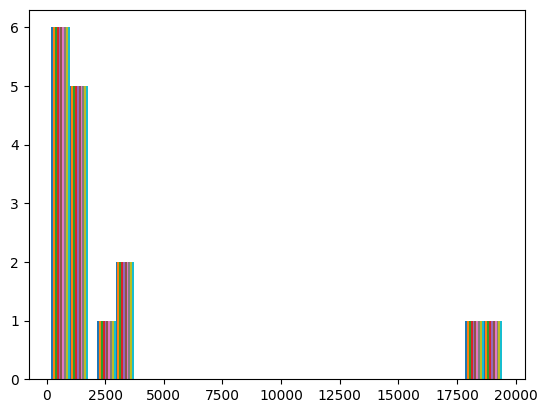

In [6]:
plt.hist(promts)

In [27]:
promts[:,0]

array([19504.,     0.,  1876.,     0.,  3005.,     0.,     0.,   263.])

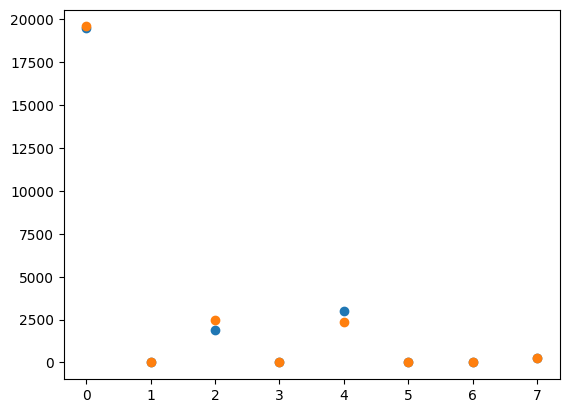

In [34]:
plt.scatter(np.arange(0, 8), promts[:, 0])
plt.scatter(np.arange(0, 8), promts[:, 15])

In [41]:
def random_drop(label_prob, point_prob, bbox_prob):
    prompts = [
        0,#("point_coords", "point_labels", "boxes"),  # labels
        1,#("labels", "boxes"),  # points
        2,#("labels", "point_coords", "point_labels"),  # bbox,
        3,#("boxes"),  # labels + points
        4,#("point_coords", "point_labels"),  # labels + bbox
        5,#(),  # labels + points + bbox
        6,#("labels"),  # point + bbox
        7,#("labels", "point_coords", "point_labels", "boxes"),  # no prompts
    ]
    probabilities = [
        label_prob,
        point_prob,
        bbox_prob,
        label_prob * point_prob,
        label_prob * bbox_prob,
        label_prob * point_prob * bbox_prob,
        point_prob * bbox_prob,
        label_prob * point_prob * bbox_prob,
    ]

    key_drop = random.choices(prompts, weights=probabilities, k=1)

    return key_drop

In [54]:
label_prob = 0.5
point_prob = 0.5
bbox_prob = 0.5
promt_acc = np.zeros((1,8))
for i in range(100000):
    key_drop = random_drop(label_prob, point_prob, bbox_prob)
    promt_acc[0, key_drop[0]] += 1

In [59]:
promts

array([[19504., 19502., 19467., 19618., 19415., 19520., 19560., 19420.,
        19540., 19487., 19549., 19470., 19534., 19520., 19456., 19582.,
        19587., 19594., 19555., 19541.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.],
       [ 1876.,  1863.,  1908.,  1840.,  1870.,  1921.,  1871.,  1871.,
         1819.,  1857.,  2353.,  2447.,  2384.,  2413.,  2449.,  2457.,
         2430.,  2414.,  2396.,  2416.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.],
       [ 3005.,  3024.,  3033.,  2949.,  3123.,  2950.,  2988.,  3107.,
         3047.,  3057.,  2476.,  2489.,  2495.,  2467.,  2487.,  2354.,
         2404.,  2387.,  2473.,  2468.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
   